In [1]:
##library  as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


In [5]:
image_dir = "C:\\woodystudio\\OOP7\\drug_image"
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))
image_files[:5]

1872


['가나프리드정(이토프리드염산염).jpg',
 '가모시드정5밀리그램(모사프리드시트르산염수화물).jpg',
 '가바뉴로캡슐150밀리그램(프레가발린).jpg',
 '가바뉴로캡슐75밀리그램(프레가발린).jpg',
 '가바리카캡슐150밀리그램(프레가발린)(수출용).jpg']

In [17]:
class_list = set()
for image_file in image_files:
    file_name = re.split('[/,(,). :, _]',image_file)[-2]
    class_name = re.split('[/,(,). :, _]',image_file)[-2]
    class_list.add(class_name)
class_list = list(class_list)
print(len(class_list))

574


In [15]:
class_list.sort()
class_list[:5]

['', '10', '1000밀리그램', '100밀리그램', '10mg']

In [16]:
class_list[1]

'10'

In [12]:
class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'': 0,
 '10': 1,
 '1000밀리그램': 2,
 '100밀리그램': 3,
 '10mg': 4,
 '10밀리그램': 5,
 '160밀리그램': 6,
 '20': 7,
 '200mg': 8,
 '200밀리그램': 9,
 '20mg': 10,
 '20밀리그램': 11,
 '250밀리그램': 12,
 '25mg': 13,
 '25밀리그램': 14,
 '40밀리그램': 15,
 '500mg': 16,
 '500밀리그램': 17,
 '50밀리그램': 18,
 '5mg': 19,
 '5밀리그램': 20,
 '80밀리그램': 21,
 '850밀리그램': 22,
 ']': 23,
 '가스파플러스정': 24,
 '간보왕연질캡슐': 25,
 '게리드엠정': 26,
 '겔티-포르테연질캡슐': 27,
 '경보록소프로펜나트륨수화물정': 28,
 '경보카르베딜롤정': 29,
 '고려칸데사르탄플러스정': 30,
 '고운자임맘정': 31,
 '고운자임수정': 32,
 '고프레넥스연질캡슐': 33,
 '고프레노즈연질캡슐': 34,
 '광동라푸티딘정': 35,
 '광동록소프로펜나트륨수화물정': 36,
 '그날엔노즈연질캡슐': 37,
 '그날엔정': 38,
 '그날엔코프연질캡슐': 39,
 '그날엔콜드연질캡슐': 40,
 '글로아타플러스정': 41,
 '글로엠정': 42,
 '글리메론정': 43,
 '글리메릴엠정': 44,
 '글리미드엠정': 45,
 '글리베타엠정': 46,
 '글리필멕스정': 47,
 '기가콜캡슐': 48,
 '기네스타정': 49,
 '나또밸런스정': 50,
 '나츄라트코와정': 51,
 '난타코연질캡슐': 52,
 '난타코프연질캡슐': 53,
 '네버콜캡슐': 54,
 '넥쿨연질캡슐': 55,
 '노바킹골드캡슐': 56,
 '뉴콘틴연질캡슐': 57,
 '뉴키센비타츄어블정': 58,
 '뉴화콜코프캡슐': 59,
 '니네틸정': 60,
 '다나코프연질캡슐': 61,
 '다비움정': 62,
 '다이락스-큐정': 63,
 '단나에프캡슐': 64,
 '대우플루코나졸캡슐

In [19]:
## train, validation directory 생성
train_dir = os.path.join(image_dir, 'train')
val_dir = os.path.join(image_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [20]:
image_files.sort()

In [25]:
#한 번 했으면 안해도 되는 TRAIN_TEST_SPLIT
cnt = {}
previous_class = ""
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    print(file_name)
    class_name = re.split('[/,(,). :, _]',file_name)[-1]
         print(class_name)
    if class_name in cnt:
         cnt[class_name] += 1
    else:
         cnt[class_name] = 1
    if cnt[class_name] <= 80:
         cpath = train_dir
    else:
        cpath = val_dir
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, cpath)
    previous_class = class_name

가나프리드정(이토프리드염산염)

가모시드정5밀리그램(모사프리드시트르산염수화물)

가바뉴로캡슐150밀리그램(프레가발린)

가바뉴로캡슐75밀리그램(프레가발린)

가바리카캡슐150밀리그램(프레가발린)(수출용)

가바리카캡슐75밀리그램(프레가발린)(수출용)

가브스메트정50()500밀리그램
500밀리그램
가스디알정50밀리그램(디메크로틴산마그네슘)

가스리드정5mg(모사프리드시트르산염수화물)

가스베트정5밀리그램(모사프리드시트르산염수화물)

가스잘정(모사프리드시트르산염이수화물)

가스티인정(모사프리드시트르산염이수화물)

가스파플러스정
가스파플러스정
가스프렌정(모사프리드시트르산염이수화물)

간보왕연질캡슐
간보왕연질캡슐
갈라닐피알서방캡슐16밀리그램(갈란타민브롬화수소산염)

갈라닐피알서방캡슐24밀리그램(갈란타민브롬화수소산염)

게리드엠정
게리드엠정
게리메트정2()500밀리그램
500밀리그램
겔티-포르테연질캡슐
겔티-포르테연질캡슐
경보록소프로펜나트륨수화물정
경보록소프로펜나트륨수화물정
경보이반드로네이트정(이반드론산나트륨일수화물)

경보카르베딜롤정
경보카르베딜롤정
경보클로피도그렐정(클로피도그렐황산염)

고려칸데사르탄정16밀리그램(칸데사르탄실렉세틸)

고려칸데사르탄플러스정
고려칸데사르탄플러스정
고운자임맘정
고운자임맘정
고운자임수정
고운자임수정
고프레넥스연질캡슐
고프레넥스연질캡슐
고프레노즈연질캡슐
고프레노즈연질캡슐
광동라푸티딘정
광동라푸티딘정
광동록소프로펜나트륨수화물정
광동록소프로펜나트륨수화물정
굿스펜연질캡슐(덱시부프로펜)

그날엔노즈연질캡슐
그날엔노즈연질캡슐
그날엔정
그날엔정
그날엔코프연질캡슐
그날엔코프연질캡슐
그날엔콜드연질캡슐
그날엔콜드연질캡슐
그리마린엠정2()500밀리그램
500밀리그램
그리메폴서방정2()500밀리그램
500밀리그램
그릴정(글리메피리드)

글라포민에스알정2()500mg
500mg
글라포민엠정1()250밀리그램
250밀리그램
글라포민엠정1()500밀리그램
500밀리그램
글라포민엠정2()500밀리그램
500밀리그램
글레딘엠정2()500밀리그램
500밀리그램
글레아정

리가린캡슐75mg(프레가발린)

리넥신정
리넥신정
리노반10캡슐(시부트라민말레산염)

리도넬디정
리도넬디정
리도넬정150밀리그램(리세드론산나트륨일수화물)

리드로퀸정150밀리그램(리세드론산나트륨일수화물)

리드비타큐정
리드비타큐정
리드큐텐연질캡슐
리드큐텐연질캡슐
리드펜캡슐(덱시부프로펜)

리락손정(에페리손염산염)

리록스정(록소프로펜나트륨수화물)

리리스정
리리스정
리마로스정(리마프로스트알파덱스)

리마스타정(리마프로스트알파덱스)

리마스트정(리마프로스트알파덱스)

리마알파정(리마프로스트알파덱스)

리메트엠정
리메트엠정
리바로정4밀리그램(피타바스타틴칼슘수화물)

리바린캡슐150밀리그램(프레가발린)

리바린캡슐75밀리그램(프레가발린)

리바스타틴정20밀리그램(심바스타틴)

리바스틴정2밀리그램(피타바스타틴칼슘)

리발린캡슐150밀리그램(프레가발린)

리발린캡슐75밀리그램(프레가발린)

리버골드파워350mg연질캡슐(밀크시슬열매건조엑스)

리버큐연질캡슐(밀크시슬열매건조엑스)

리버텍트골드연질캡슐
리버텍트골드연질캡슐
리버파워포르테연질캡슐
리버파워포르테연질캡슐
리버풀350연질캡슐(밀크시슬열매건조엑스)

리버플란연질캡슐
리버플란연질캡슐
리벡실정(아데포비어디피복실)

리비알정(티볼론)

리세넥스엠정
리세넥스엠정
리세드린정150밀리그램(리세드론산나트륨2.5수화물)

리세맥정150밀리그램(리세드론산나트륨2.5수화물)

리세바플러스연질캡슐
리세바플러스연질캡슐
리세토정150밀리그램(리세드론산나트륨2.5수화물)

리세트론정150밀리그램(리세드론산나트륨2.5수화물)

리센플러스정
리센플러스정
리소젠정(리소짐염산염)

리소페린정1mg(리스페리돈)

리스넬정150밀리그램(리세드론산나트륨일수화물)

리스돈정3밀리그램(리스페리돈)

리스피돈오디정1밀리그램(리스페리돈)

리스피돈오디정2밀리그램(리스페리돈)

리오다제정(스트렙토키나제·스트렙토도르나제)

리치본먼쓰정150밀리그램(리세드론산나트륨일수화물)

리카린캡슐150밀리그램(프레가발린)

리카린캡슐75밀리그램(프레가발린)

리카발캡슐150밀리

세파캡슐250mg(세파클러수화물)

세프피보정100밀리그램(세프카펜피복실염산염수화물)

센스리베정
센스리베정
센시아정(센텔라정량추출물)

센타민플러스연질캡슐
센타민플러스연질캡슐
센트룸실버정
센트룸실버정
셀레콕스캡슐(세레콕시브)

셀레토코플러스연질캡슐
셀레토코플러스연질캡슐
셀레트론플러스연질캡슐
셀레트론플러스연질캡슐
셀비콤연질캡슐
셀비콤연질캡슐
셀크빈연질캡슐
셀크빈연질캡슐
소브콜캡슐200mg(소브레롤)

속콜코프엘연질캡슐
속콜코프엘연질캡슐
속콜파워연질캡슐(수출용)

속콜플러스연질캡슐
속콜플러스연질캡슐
속편아제정
속편아제정
솔라비타정
솔라비타정
솔라제정(프로나제B)

솝튼정(티자니딘염산염)

수로신디정(탐스로신염산염)

수마트란정50밀리그램(수마트립탄숙신산염)

수바스트정10밀리그램(로수바스타틴칼슘)

수바스트정20밀리그램(로수바스타틴칼슘)

슈가펜에스정
슈가펜에스정
슈니펜정(모니플루메이트)

슈티린정
슈티린정
슈펙트캡슐100밀리그램(라도티닙염산염)

슈펙트캡슐200밀리그램(라도티닙염산염)

스리날-에스정
스리날-에스정
스카풀라정
스카풀라정
스코나졸정(이트라코나졸)

스키나제정(스트렙토키나제·스트렙토도르나제)

스타넵틴정(티아넵틴나트륨)

스타레보필름코팅정125()31.25()200밀리그램
200밀리그램
스타레보필름코팅정75()18.75()200밀리그램
200밀리그램
스타레탐정1000밀리그램(레비티라세탐)

스타레탐정250밀리그램(레비티라세탐)

스타레탐정500밀리그램(레비티라세탐)

스타보린정(티아넵틴나트륨)

스트라테라캡슐80밀리그램(아토목세틴염산염)

스티론정(티아넵틴나트륨)

스티아론정(티아넵틴나트륨)

스포코라정(이트라코나졸고체분산체)

스프라이셀정100밀리그램(다사티닙)

스프라이셀정50밀리그램(다사티닙)

스피딕400연질캡슐(이부프로펜)

스피콜드연질캡슐
스피콜드연질캡슐
슬렌페드씨정
슬렌페드씨정
시너젯이알서방정
시너젯이알서방정
시노카에프연질캡슐
시노카에프연질캡슐
시노콜드비타정
시노콜드비타정
시노피드플러스에프연질캡슐
시노피드플러스에프연질캡슐
시리카캡슐15

이모나에프캡슐(수출용)

이모돌정(옥수수불검화정량추출물)

이미트릴정5밀리그램(이미다프릴염산염)

이바넬정(이반드론산나트륨일수화물)

이바본정150밀리그램(이반드론산나트륨일수화물)

이바테론정150mg(이반드론산나트륨일수화물)

이반네이트정150밀리그램(이반드론산나트륨일수화물)

이반드렌정150밀리그램(이반드론산나트륨일수화물)

이반드론정(이반드론산나트륨일수화물)

이베라정150밀리그램(이르베사르탄)

이베라정300밀리그램(이르베사르탄)

이베라플러스정150()12.5밀리그램
5밀리그램
이벨탄플러스정150()12.5밀리그램
5밀리그램
이벨탄플러스정300()12.5밀리그램
5밀리그램
이본덴스정(이반드론산나트륨일수화물)

이본드로정(이반드론산나트륨일수화물)

이부플러스생정
이부플러스생정
이브미정
이브미정
이자벨탄정150밀리그램(이르베사르탄)

이자벨탄정300밀리그램(이베사탄)

이잘탄정150밀리그램(이르베사르탄)

이잘탄정300밀리그램(이르베사르탄)

이젠이캡슐
이젠이캡슐
이지목플러스씨캡슐
이지목플러스씨캡슐
이지스타정10()10밀리그램
10밀리그램
이지스타정10()20밀리그램
20밀리그램
이지에스정(방기황기탕건조엑스)

이탄탄큐캡슐(수출용)

이탄탄플러스캡슐
이탄탄플러스캡슐
이프렌에스연질캡슐(덱시부프로펜)

익셀캡슐12.5밀리그램(밀나시프란염산염)

익스트림정20밀리그램(판토프라졸나트륨세스키히드레이트)

인도메타캡슐(인도메타신)

인라이타정1밀리그램(엑시티닙)

인라이타정5밀리그램(엑시티닙)

인스펜정
인스펜정
인케어정(옥수수불검화정량추출물)

인코라민프리미어정
인코라민프리미어정
일양로자탄플러스프로정
일양로자탄플러스프로정
일양실데나필정100밀리그램
일양실데나필정100밀리그램
일양실데나필정50밀리그램(실데나필시트르산염)

일양이반드론산정150밀리그램(이반드론산나트륨일수화물)

일양텔미사탄정40밀리그램(텔미사르탄)

일양텔미사탄정80밀리그램(텔미사르탄)

일양텔미사탄플러스정40()12.5밀리그램
5밀리그램
일양텔미사탄플러스정80()12.5밀리그램
5밀리그램
일양텔미사

팔팔츄정50밀리그램(실데나필)

팜비드정250밀리그램(팜시클로비르)

팜비르정250mg(팜시클로비르)

팜시정250밀리그램(팜시클로비르)

패스코프연질캡슐
패스코프연질캡슐
패스콜드연질캡슐
패스콜드연질캡슐
퍼펙코연질캡슐
퍼펙코연질캡슐
퍼펙코프연질캡슐
퍼펙코프연질캡슐
퍼펙콜연질캡슐
퍼펙콜연질캡슐
페노시드캡슐(페노피브릭산)

페라트라정2.5밀리그램(레트로졸)

페롤민골드연질캡슐
페롤민골드연질캡슐
페브릭정80밀리그램(페북소스타트)

페이론캡슐(아미노벤조산칼륨)

펜더정(펜터민염산염)

펜디멘정(펜디메트라진타르타르산염)

펜디진정35mg(펜디메트라진타르타르산염)

펜디펜정(펜디메트라진타르타르산염)

펜믹스가바펜틴캡슐100밀리그램
펜믹스가바펜틴캡슐100밀리그램
펜믹스아제스틴정(아젤라스틴염산염)

펜잘레이디정
펜잘레이디정
펜타사서방정1g(메살라진)

펜폴캡슐(펜토산폴리설페이트나트륨)

포디엠정1()250밀리그램
250밀리그램
포디엠정2()500밀리그램
500밀리그램
포렌드플러스디정
포렌드플러스디정
포르테라구강용해필름50밀리그램(실데나필)

포르테브이정100밀리그램(실데나필시트르산염)

포사드론플러스디정
포사드론플러스디정
포사제닉플러스디정
포사제닉플러스디정
포스넬정150밀리그램(리세드론산나트륨2.5수화물)

포스펜정
포스펜정
포인타민정
포인타민정
포타스틴오디정(베포타스틴칼슘이수화물)

폴라리스정100밀리그램(아미설피리드)

폴리아린에프캡슐
폴리아린에프캡슐
폴리아린캡슐
폴리아린캡슐
폴시드정0.4밀리그램(폴산)

폴엔정(폴산)

폴원연질캡슐(폴산)

푸로그라정100밀리그램(실데나필시트르산염)

푸로날캡슐(플루코나졸)

푸로콜에스캡슐
푸로콜에스캡슐
푸루코졸캡슐(플루코나졸)

프라닥사캡슐150밀리그램(다비가트란에텍실레이트메실산염)

프라바페닉스캡슐
프라바페닉스캡슐
프라빅센정(클로피도그렐황산염)

프라펙솔정0.125밀리그램(프라미펙솔염산염일수화물)

프라펙솔정0.25밀리그램(프라미펙솔염산염일수화물)

프라펙솔정0.5밀리그램(프라미펙솔염산염일수화물)

프라펙솔정1밀리그램(프라미펙솔염산

In [26]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [27]:
print(len(train_images), len(val_images))

795 1077


In [28]:
train_images[:10]

['가나프리드정(이토프리드염산염).jpg',
 '가모시드정5밀리그램(모사프리드시트르산염수화물).jpg',
 '가바뉴로캡슐150밀리그램(프레가발린).jpg',
 '가바뉴로캡슐75밀리그램(프레가발린).jpg',
 '가바리카캡슐150밀리그램(프레가발린)(수출용).jpg',
 '가바리카캡슐75밀리그램(프레가발린)(수출용).jpg',
 '가브스메트정50()500밀리그램.jpg',
 '가스디알정50밀리그램(디메크로틴산마그네슘).jpg',
 '가스리드정5mg(모사프리드시트르산염수화물).jpg',
 '가스베트정5밀리그램(모사프리드시트르산염수화물).jpg']

In [29]:
val_images[:10]

['뉴멘타민서방캡슐8밀리그램(갈란타민브롬화수소산염).jpg',
 '뉴비그라정100밀리그램(실데나필시트르산염).jpg',
 '뉴사탄정160밀리그램(발사르탄).jpg',
 '뉴사탄정80밀리그램(발사르탄).jpg',
 '뉴스타틴에이정10밀리그램(아토르바스타틴칼슘삼수화물).jpg',
 '뉴스타틴에이정20밀리그램(아토르바스타틴칼슘삼수화물).jpg',
 '뉴젠이미다프릴정5mg(이미다프릴염산염).jpg',
 '뉴큅정0.25밀리그램(로피니롤염산염).jpg',
 '뉴큅정1밀리그램(로피니롤염산염).jpg',
 '뉴프람정20밀리그램(에스시탈로프람옥살산염).jpg']

TFRecord File 만들기

In [30]:
IMG_SIZE = 224

In [31]:
## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join(image_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')

In [32]:
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [33]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [34]:
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(train_file)[0] #Bangal_101
  class_name = re.split('[/,(,). :, _]',file_name)[-1]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1

writer_train.close()
print(n_train)

795


In [35]:
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  class_name = re.split('[/,(,). :, _]',file_name)[-1]
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

1077


In [36]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 30
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH#STEPS_PER_EPOCH =n_train//batch_size # len(train_data) // batch_size
validation_steps = int(np.ceil(N_VAL / N_BATCH))#VALIDATION_STEPS = n_val//batch_size # len(valid_data) // batch_size

In [37]:
# BATCH_SIZE = 16
# STEPS_PER_EPOCH =n_train//batch_size # len(train_data) // batch_size
# EPOCHS = 15
# VALIDATION_STEPS = n_val//batch_size # len(valid_data) // batch_size
# LEARNING_RATE = 1e-4 
# INPUT_SHAPE = (224, 224, 3)

In [39]:
## tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)
    label = tf.one_hot(label, N_CLASS)

    return image, label

In [41]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()


In [42]:
## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

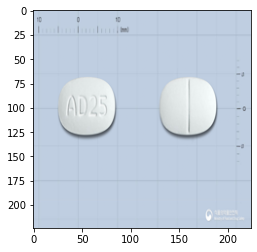

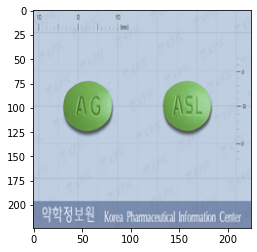

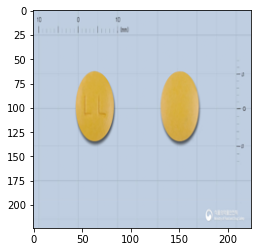

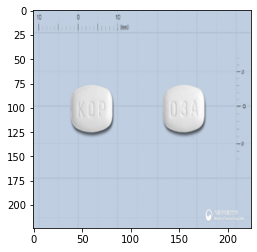

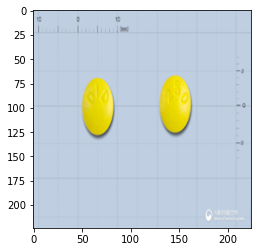

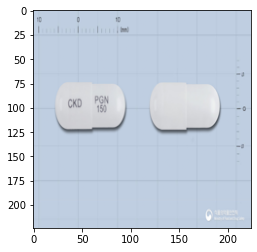

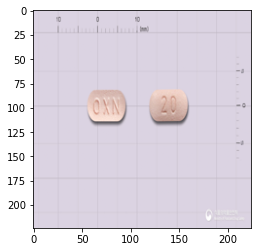

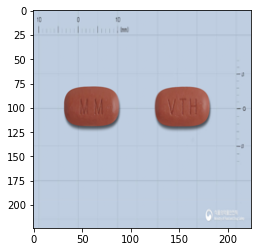

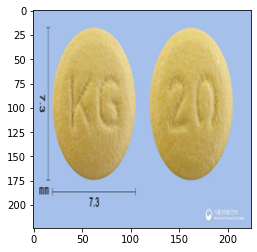

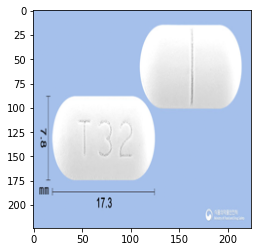

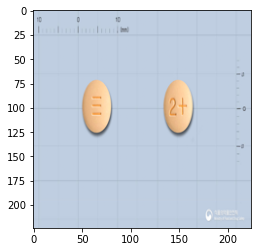

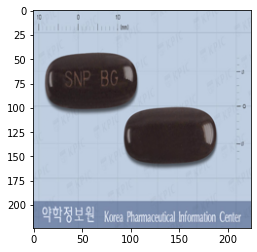

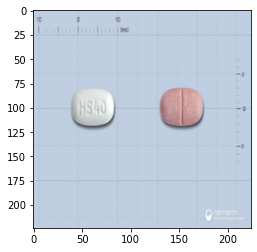

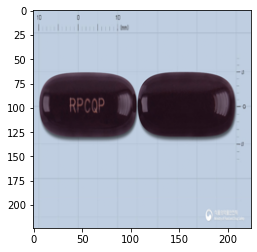

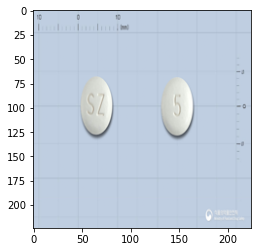

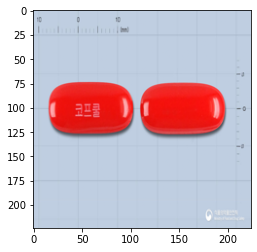

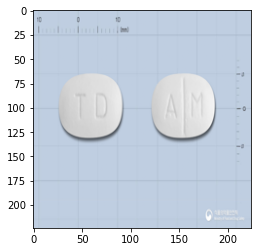

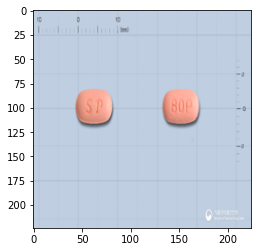

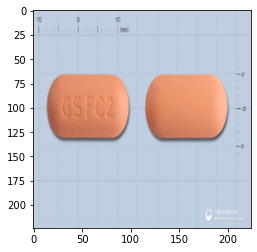

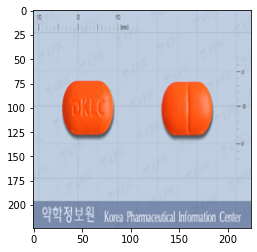

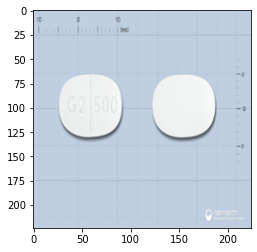

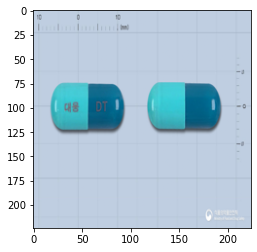

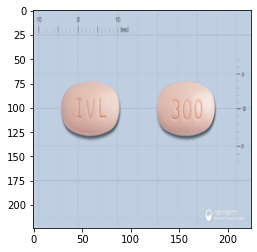

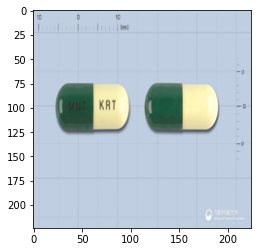

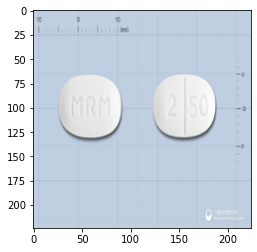

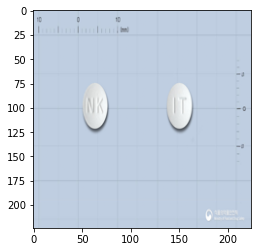

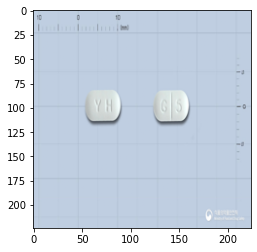

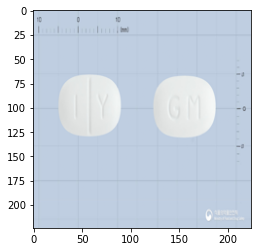

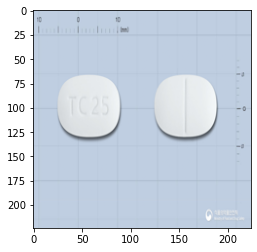

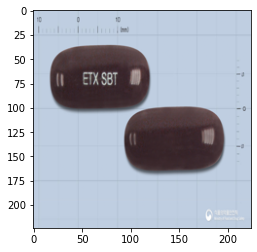

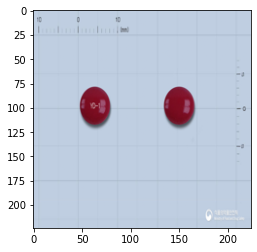

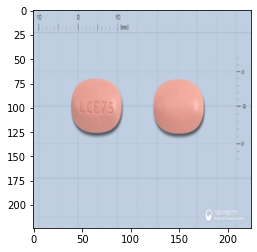

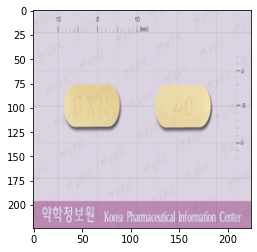

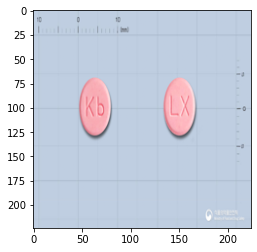

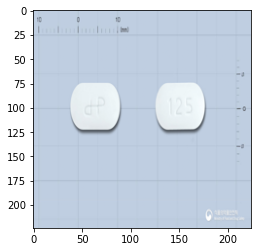

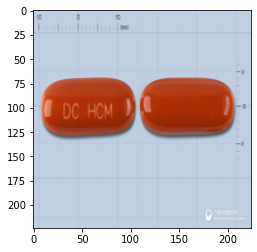

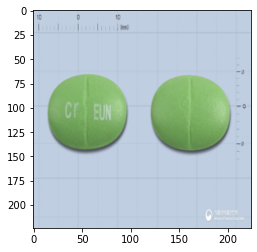

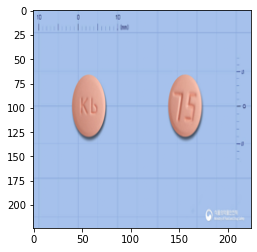

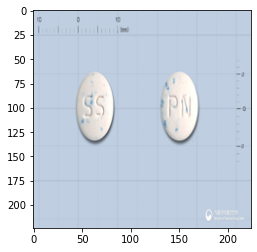

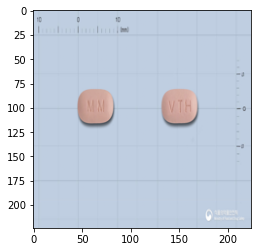

In [43]:
for image, label in train_dataset.take(1):
  for i in range(N_BATCH):    
#     print(label[i].numpy())
    plt.imshow(image[i])
    plt.show()

In [44]:
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [45]:
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

9406464/9406464 [==============================] - 3s 0us/step


In [46]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [47]:
def create_mv_model():
    # 새로운 모델 생성하기
    last = mobilenetv2.output
    x = GlobalAveragePooling2D()(last)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    pred = Dense(N_CLASS, activation='softmax')(x)
    
    model = Model(mobilenetv2.input, pred)
    model.summary
    return model
#   model = models.Sequential()
#   model.add(mobilenetv2)
#   model.add(GlobalAveragePooling2D())
#   model.add(Dense(256))
#   model.add(BatchNormalization())
#   model.add(ReLU())
#   model.add(Dense(N_CLASS, activation='softmax'))
#   return model

In [48]:
## Create model, compile & summary
model = create_mv_model()

LR_INIT = 0.000001
LR_MAX = 0.0002
LR_MIN = LR_INIT
RAMPUP_EPOCH = 4
EXP_DECAY = 0.9

def lr_schedule_fn(epoch):
  if epoch < RAMPUP_EPOCH:
    lr = (LR_MAX - LR_MIN) / RAMPUP_EPOCH * epoch + LR_INIT
  else:
    lr = (LR_MAX - LR_MIN) * EXP_DECAY**(epoch - RAMPUP_EPOCH)
  return lr

lr_callback = keras.callbacks.LearningRateScheduler(lr_schedule_fn)

model.compile(optimizer=tf.keras.optimizers.Adam(LR_INIT),
              loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

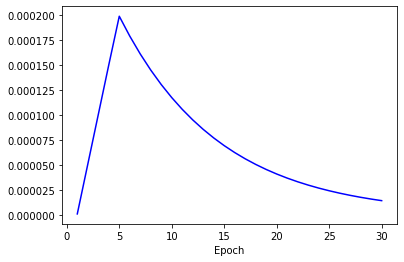

In [49]:
def plot_lr():
  lr = []
  epoch_list = list(np.arange(N_EPOCHS) + 1)
  for epoch in range(N_EPOCHS):
    lr.append(lr_schedule_fn(epoch))    
  plt.plot(epoch_list, lr, 'b-')
  plt.xlabel('Epoch')
  plt.show()

plot_lr()

In [50]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=[lr_callback]
)

Epoch 1/30
19/19 [==============================] - 179s 8s/step - loss: 6.4887 - accuracy: 0.0000e+00 - val_loss: 6.1107 - val_accuracy: 0.0000e+00 - lr: 1.0000e-06
Epoch 2/30
19/19 [==============================] - 160s 8s/step - loss: 6.2930 - accuracy: 0.0252 - val_loss: 5.8476 - val_accuracy: 0.0158 - lr: 5.0750e-05
Epoch 3/30
19/19 [==============================] - 147s 7s/step - loss: 5.6849 - accuracy: 0.1434 - val_loss: 5.3918 - val_accuracy: 0.2275 - lr: 1.0050e-04
Epoch 4/30
19/19 [==============================] - 142s 7s/step - loss: 5.0317 - accuracy: 0.2730 - val_loss: 4.8316 - val_accuracy: 0.6147 - lr: 1.5025e-04
Epoch 5/30
19/19 [==============================] - 144s 7s/step - loss: 4.4902 - accuracy: 0.4025 - val_loss: 4.6133 - val_accuracy: 0.6769 - lr: 1.9900e-04
Epoch 6/30
19/19 [==============================] - 142s 7s/step - loss: 3.9943 - accuracy: 0.5660 - val_loss: 4.4181 - val_accuracy: 0.7084 - lr: 1.7910e-04
Epoch 7/30
19/19 [==========================

In [51]:
#save model and weight

model.save('Pill_image_pretrained_mobile_model_2.h5')

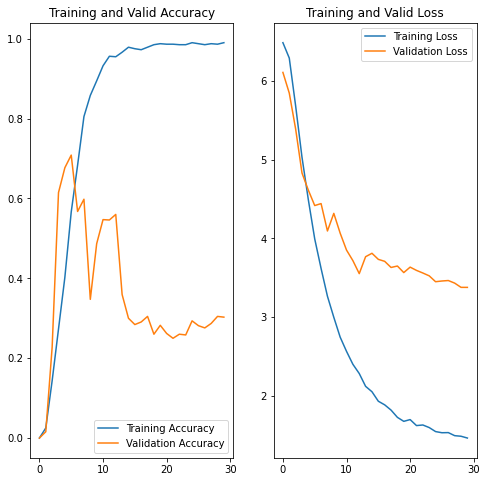

In [52]:
# loss, acc curve

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(N_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Valid Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Valid Loss')
plt.show()

In [55]:
def test(img_dir):
    image = Image.open(img_dir)
    image = image.resize((224, 224))
    image = np.array(image)
    image = image/255.
    
    plt.imshow(image)
    plt.show()
    
    image = np.reshape(image, (1, 224, 224, 3))
    
    prediction = model.predict(image)
    prediction.shape
    pred_class = np.argmax(prediction, axis=-1)
    pred_class
    
    print("예측: ", class_list[int(pred_class)])

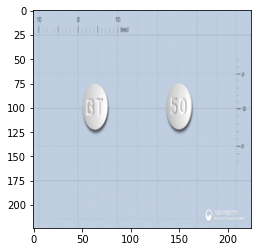

1/1 [==============================] - 2s 2s/step
예측:  오메코프정


In [56]:
test("C:\\woodystudio\\OOP7\\drug_image\\가나프리드정(이토프리드염산염).jpg")

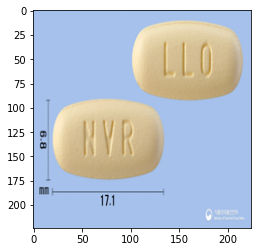

1/1 [==============================] - 0s 68ms/step
예측:  비타모니에이스연질캡슐


In [57]:
test("C:\\woodystudio\\OOP7\\drug_image\\가브스메트정50()500밀리그램.jpg")

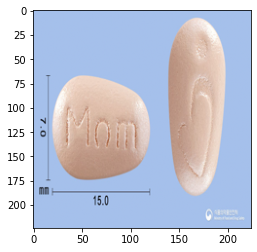

1/1 [==============================] - 0s 71ms/step
예측:  비타모니에이스연질캡슐


In [58]:
test("C:\\woodystudio\\OOP7\\drug_image\\고운자임맘정.jpg")

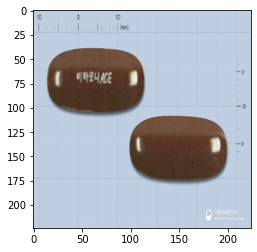

1/1 [==============================] - 0s 65ms/step
예측:  비타모니에이스연질캡슐


In [59]:
test("C:\\woodystudio\\OOP7\\drug_image\\비타모니에이스연질캡슐.jpg")